In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

DATA COLLECTION AND ANALYSIS

In [2]:
#from csv file taking data
dataset = pd.read_csv('./insurance.csv')
dataset.head()
#cost cahrges are in us dollars


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#number of rows and columns
dataset.shape

(1338, 7)

In [4]:
#getting some information about the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#checking for missing values
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

    DATA ANALYSIS WITH PLOTS
    

In [6]:
#statistical measures of the data
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


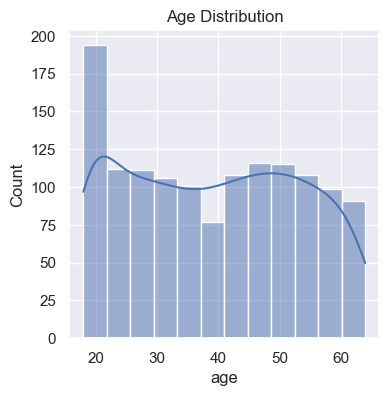

In [7]:
#distribution of age value
sns.set_theme()
plt.figure(figsize=(4,4))
sns.histplot(dataset['age'],kde=True)
plt.title('Age Distribution')
plt.show()

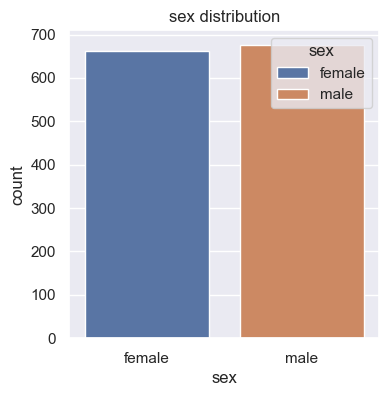

In [8]:
#gender column distribution
plt.figure(figsize=(4,4))
sns.countplot(x='sex',data=dataset,hue='sex',legend=True)
plt.title('sex distribution')
plt.show()

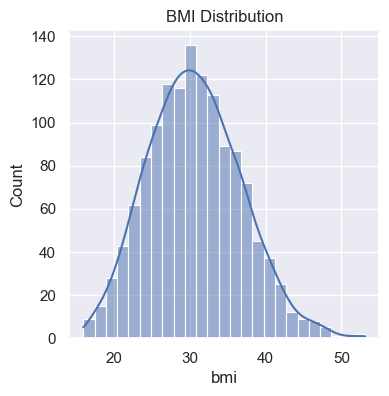

In [9]:
#bmi distribution
plt.figure(figsize=(4,4))
sns.histplot(dataset['bmi'],kde=True)
plt.title('BMI Distribution')
plt.show()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

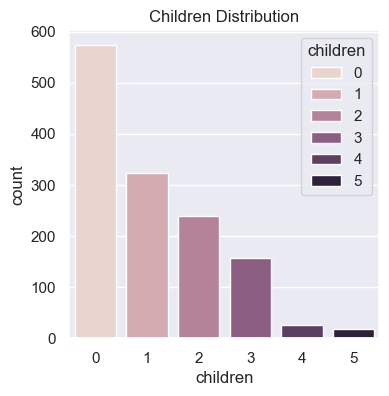

In [10]:
#normal bmi range is 18.5 to 24.9
#children column distribution
plt.figure(figsize=(4,4))
sns.countplot(x='children',data=dataset,hue='children',legend=True)
plt.title('Children Distribution')
dataset['children'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

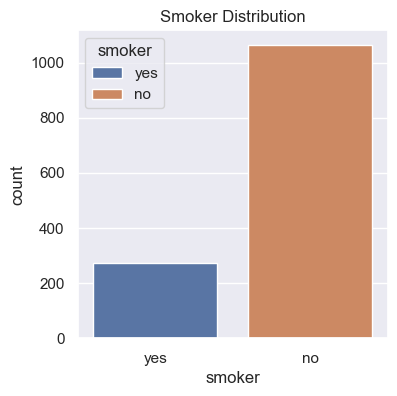

In [11]:
#smoker column distribution
plt.figure(figsize=(4,4))
sns.countplot(x='smoker',data=dataset,hue='smoker',legend=True) 
plt.title('Smoker Distribution')
dataset['smoker'].value_counts()


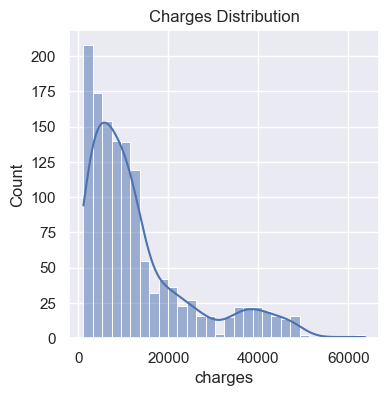

In [12]:
#charge distribution
plt.figure(figsize=(4,4))
sns.histplot(dataset['charges'],kde=True)
plt.title('Charges Distribution')
plt.show()

DATA PREPROCESSING

In [17]:
#ENCODING SEX  and smoker COLUMN as 0 or 1
#male:0 and female:1 and smoker:1 and non-smoker:0
mapping={'sex':{'male':0,'female' :1,'yes':1,'no':0},
         'smoker':{'yes':1,'no':0},
         'region':{'southwest':0,'southeast':1,'northwest':2,'northeast':3}}
dataset1=dataset.assign(**{col: lambda x: x[col].map(mapping[col]) for col in mapping})
#using assign function

#dataset.replace({'sex':{'male':0,'female':1}},inplace=True) deprecated
#dataset.replace({'smoker':{'no':0,'yes':1}},inplace=True) deprecated

#regions aswell encoding
#dataset.replace({'region':{'southwest':0,'southeast':1,'northwest':2,'northeast':3}},inplace=True) deprecated

dataset1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,2,22.705,0,2,2,21984.47061
4,32,2,28.880,0,2,2,3866.85520


In [ ]:
#splitting the data into dependent and independent features
x=dataset.drop(columns='charges',axis=1)#if column is dropped then axis=1 and if row is dropped then axis=0
y=dataset['charges']
print(x)
print(y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       0
1      18    0  33.770         1       0       1
2      28    0  33.000         3       0       1
3      33    0  22.705         0       0       2
4      32    0  28.880         0       0       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       2
1334   18    1  31.920         0       0       3
1335   18    1  36.850         0       0       1
1336   21    1  25.800         0       0       0
1337   61    1  29.070         0       1       2

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [ ]:
#splitting the data into training data and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


MODEL TRAINING


In [ ]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)#training done

LinearRegression()

In [ ]:
#model evaluation on training data
training_data_prediction=regressor.predict(x_train)
acuracy_train=metrics.r2_score(y_train,training_data_prediction)
print('R2 score of training data:',acuracy_train)

R2 score of training data: 0.7519923667088932


In [ ]:
#model evaluation on test data
test_data_prediction=regressor.predict(x_test)
acuracy_test=metrics.r2_score(y_test,test_data_prediction)
print('R2 score of test data:',acuracy_test)

R2 score of test data: 0.7445422986536502


In [ ]:
#input_data
def data_eval():
    region_dict = {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}
    sex_dict={'male':0,'female':1}
    smoker_dict={'yes':1,'no':0}
    age=int(input('Enter age: '))
    sex=input('Enter sex: ')
    bmi=float(input('Enter bmi: '))
    children=int(input('Enter children: '))
    smoker=input('Enter smoker: ')
    region=input('Enter region: ')
    
    return (age,sex_dict[sex],bmi,children,smoker_dict[smoker],region_dict[region])

#input_data=data_eval()
input_data=[19,0,27.9,0,1,3]

new_input=np.asarray(input_data).reshape(1,-1)
prediction=regressor.predict(new_input)
print('The insurance cost is:',prediction[0])


The insurance cost is: 26127.27644850266


c:\Users\SAYANJIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
